In [214]:
import pandas as pd

df = pd.read_csv('coin_flips.csv')

In [215]:
from random import randint
def sample_random_flips(x):
    return ''.join(str(randint(0,1)) for _ in range(len(x)))

df_fake = df.copy()
df_fake['flips'] = df_fake['flips'].map(sample_random_flips)

In [216]:
#!pip install regex
import regex as re

def count_overlapping(text, search_for):
    return len(re.findall(search_for, text, overlapped=True))

def make_seq_column(df, seq):
    df['seq_' + seq] = df['flips'].map(lambda x: count_overlapping(x, seq)/(len(x) - len(seq) + 1))

In [219]:
import itertools

def populate_length_n_seqs(n):
    for s in itertools.product(*([['0', '1']]*n)):
        make_seq_column(df_fake, ''.join(s))
        make_seq_column(df, ''.join(s))

for n in range(10):
    populate_length_n_seqs(n)

df

,student,flips,seq_0,seq_1,seq_00,seq_01,seq_10,seq_11,seq_,seq_000,...,seq_111110110,seq_111110111,seq_111111000,seq_111111001,seq_111111010,seq_111111011,seq_111111100,seq_111111101,seq_111111110,seq_111111111
0,math199chp2017fall1,0000011001000011101010011101111010001110110100...,0.480769,0.519231,0.212560,0.270531,0.265700,0.251208,1.0,0.092233,...,0.005000,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000
1,math199chp2017fall2,0010101100010111100101011000101100100011011001...,0.533113,0.466887,0.255814,0.279070,0.275748,0.189369,1.0,0.086667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,math199chp2017fall3,0000101010001010011111001011110010110000000101...,0.529412,0.470588,0.289941,0.236686,0.236686,0.236686,1.0,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,math199chp2017fall4,1101001110101001110101100001101101000100111010...,0.500000,0.500000,0.195767,0.306878,0.306878,0.190476,1.0,0.069149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,math199chp2017fall5,0010100111011011010110000110010011000101100110...,0.477987,0.522013,0.158228,0.322785,0.316456,0.202532,1.0,0.031847,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,math199chp2017fall6,0010110001011110101011001101010001101011110010...,0.493450,0.506550,0.153509,0.337719,0.337719,0.171053,1.0,0.044053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,math199chp2017fall7,0001011010010111100101001001110110100100001101...,0.507692,0.492308,0.196911,0.312741,0.308880,0.181467,1.0,0.069767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,math199chp2017fall8,1011010011100101101000011101001110100110100110...,0.489796,0.510204,0.189744,0.302564,0.302564,0.205128,1.0,0.061856,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,math199chp2017fall9,0011101100101001001011011000011010110111011101...,0.466019,0.533981,0.165854,0.302439,0.297561,0.234146,1.0,0.049020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,math199chp2017fall10,0010100011110101100100111001011001101000110101...,0.505338,0.494662,0.200000,0.307143,0.303571,0.189286,1.0,0.043011,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


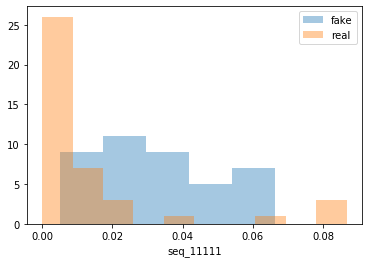

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_seq_hists(seq):
    sns.distplot(df_fake['seq_' + seq], kde=False)
    sns.distplot(df['seq_' + seq], kde=False)
    plt.legend(['fake', 'real'])
    plt.show()

make_seq_hists('11111')

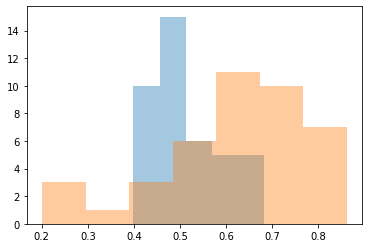

In [244]:
# these are conditional probability plots could formalize them.
# it might make sense to think of characterizing the population of fake versus population of real 
sns.distplot((df_fake['seq_001'] / df_fake['seq_00']).dropna(), kde=False)
sns.distplot((df['seq_001'] / df['seq_00']).dropna(), kde=False)
plt.show()